In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
import pandas as pd
pd.DataFrame(X, columns=iris.feature_names).head()

C:\Users\wuchu\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)

C:\Users\wuchu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [4]:
logreg.predict([[3, 5, 4, 2]])

array([0])

In [5]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [7]:
vect.fit(simple_train)

CountVectorizer()

In [8]:
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [9]:
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [10]:
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [11]:
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [12]:
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [13]:
simple_test = ["please don't call me"]

In [14]:
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [15]:
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [16]:
data=pd.read_csv("dataset/Text.csv",index_col=0)

In [17]:
data.shape

(19883, 6)

In [18]:
data.head()

,post_text,followers,friends,favourites,statuses,label
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,1
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,1
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1


In [19]:
X = data.post_text
y = data.label

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)

(14912,)
(4971,)


In [21]:
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)

In [22]:
X_train_dtm

<14912x26954 sparse matrix of type '<class 'numpy.int64'>'
	with 179955 stored elements in Compressed Sparse Row format>

In [23]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<4971x26954 sparse matrix of type '<class 'numpy.int64'>'
	with 54496 stored elements in Compressed Sparse Row format>

In [24]:
logreg = LogisticRegression()

In [26]:
y_pred_class = logreg.predict(X_test_dtm)

In [27]:
y_pred_class

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [28]:
from sklearn import metrics
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.0962857 , 0.86856451, 0.96190297, ..., 0.98023088, 0.98728077,
       0.99863483])

In [29]:
metrics.accuracy_score(y_test, y_pred_class)

0.8722591027962181

In [30]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9536692239225969

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_class, y_test))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2479
           1       0.87      0.88      0.87      2492

    accuracy                           0.87      4971
   macro avg       0.87      0.87      0.87      4971
weighted avg       0.87      0.87      0.87      4971



Text(51.0, 0.5, 'Real Labels')

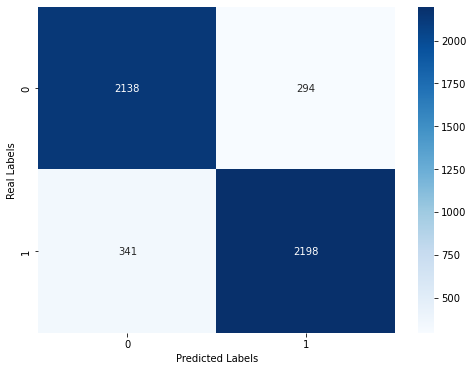

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, np.where(y_pred_class >= 0.5, 1, 0)), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')